In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns
from utilities import deets
%load_ext autoreload
%autoreload 2

In [2]:
df = (
    pd.read_csv('../../not_on_git/final_classification/all_classified.csv')
    .set_index('name')
    .query('prob>.997')
    )
df

,significance,var_flag,streak_src_flag,pileup_flag,ra,dec,missing,sat_src_flag,extent_flag,conf_flag,...,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2,0p3_8_csc,24_microns_(MIPS)
name,,,,,,,,,,,,,,,,,,,,,
2CXO J010256.7-724811,3.473684,0,0,0,15.736332,-72.803305,0.305085,0,0,0,...,3.162366,2.666958,3.142501,8.446456,2.773556,3.397729,4.124210,5.156864,NaN,NaN
2CXO J010853.2-731439,2.307692,0,0,0,17.221964,-73.244442,0.355932,0,0,0,...,3.477093,NaN,3.400918,NaN,3.280334,3.522581,NaN,NaN,NaN,NaN
2CXO J010935.1-714415,4.000000,0,0,0,17.396491,-71.737602,0.338983,0,0,0,...,NaN,4.205817,NaN,8.809085,NaN,NaN,NaN,6.812482,NaN,NaN
2CXO J011655.5-734034,2.166667,0,0,0,19.231259,-73.676364,0.288136,0,0,0,...,3.188112,2.666612,3.150756,8.262702,3.222395,3.526692,3.800834,5.823164,NaN,NaN
2CXO J012125.0-725827,10.584334,0,0,0,20.354232,-72.974249,0.389831,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3.250784,3.518963,5.990373,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J094741.9+073307,13.728778,1,0,0,146.924694,7.551989,0.237288,0,0,0,...,NaN,3.889395,NaN,4.866196,NaN,NaN,NaN,6.208020,0.027493,NaN
2CXO J094748.1+073423,3.526316,1,0,0,146.950681,7.573088,0.305085,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.976942,0.006911,NaN
2CXO J060212.5-395227,3.736842,1,0,0,90.552354,-39.874428,0.474576,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3.506049,NaN,NaN,NaN,NaN


In [3]:
deets(df,1)

_____________________________________________________
------------------------------
Number of Objects : 54770
Number of Columns : 64
------------------------------


AGN       32600
STAR      16148
YSO        5184
HMXB        439
LMXB        197
CV           89
PULSAR       63
ULX          50
Name: class, dtype: int64

_____________________________________________________


In [5]:
from utilities import get_true_data
# df = df[df['significance']>3]
df_agn = df[df['class']=='HMXB'].sort_values(by = 'prob' , ascending=False)
df_agn = df_agn[:100]
df_agn =  get_true_data(df_agn[['significance', 'ra', 'dec' , 'class' , 'prob' , 'prob_AGN' , 'prob_STAR','prob_YSO','prob_HMXB','prob_LMXB','prob_ULX','prob_CV', 'prob_PULSAR']])
df_agn = df_agn[[
    'prob', 'class', 'ra', 'dec', 'var_flag','significance','prob_AGN', 'prob_STAR', 'prob_YSO', 'prob_HMXB', 'prob_LMXB', 'prob_ULX', 'prob_CV',
    'b-csc', 'h-csc', 'm-csc', 's-csc', 'u-csc', 'hard_hm', 'hard_hs', 'hard_ms', 'b-mag', 'm-mag', 's-mag', 'h-mag', 'u-mag', 'h-m', 'h-s', 'm-s', 'fx/fo',
    'var_intra_index_b', 'var_intra_prob_b', 'ks_intra_prob_b', 'kp_intra_prob_b', 'var_inter_index_b', 'var_inter_prob_b', 'var_inter_sigma_b', 
    'umag', 'gmag', 'rmag', 'imag', 'zmag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'W3mag', 'W4mag', 
    'fuv_mag', 'nuv_mag', 'g_mag', 'bp_mag', 'rp_mag', 'bp-R', 'g-J', 'g-W2', 'bp-H', 'bp-W3', 'rp-K', 
    'J-H', 'J-W1', 'W1-W2', 'u-g', 'g-r', 'r-z', 'i-z', 'u-z', 

]]
display(df_agn)


,prob,class,ra,dec,var_flag,significance,prob_AGN,prob_STAR,prob_YSO,prob_HMXB,...,bp-W3,rp-K,J-H,J-W1,W1-W2,u-g,g-r,r-z,i-z,u-z
name,,,,,,,,,,,,,,,,,,,,,
2CXO J140257.3+541752,0.999994,HMXB,210.739132,54.298014,1,5.738382,0.000004,1.311255e-06,4.954589e-08,0.999994,...,NaN,NaN,NaN,NaN,0.399,NaN,NaN,NaN,NaN,NaN
2CXO J140300.5+542002,0.999994,HMXB,210.752100,54.333965,1,4.787879,0.000002,2.293272e-06,4.175924e-08,0.999994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J140326.6+542220,0.999993,HMXB,210.861179,54.372454,1,3.945946,0.000003,1.086618e-06,3.948019e-08,0.999993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J140310.7+542126,0.999987,HMXB,210.794701,54.357306,1,4.685714,0.000004,3.807203e-06,5.016072e-08,0.999987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J140415.7+542257,0.999985,HMXB,211.065827,54.382724,1,6.297478,0.000012,9.865339e-07,3.426305e-08,0.999985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J133015.7+471516,0.999690,HMXB,202.565459,47.254673,1,11.263278,0.000143,2.556487e-05,5.385259e-07,0.999690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J120159.1-184716,0.999689,HMXB,180.496421,-18.787972,1,4.529412,0.000251,1.483454e-05,7.633875e-07,0.999689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J121731.9+374427,0.999687,HMXB,184.382989,37.741111,1,4.888889,0.000117,5.185392e-05,1.526926e-07,0.999687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from astropy.coordinates import SkyCoord
from astropy import units as u 
ra = df_agn['ra'][0]
dec = df_agn['dec'][0]
sk = SkyCoord(ra*u.degree , dec*u.degree , frame = 'icrs')
sk

<SkyCoord (ICRS): (ra, dec) in deg
    (210.73913207, 54.2980139)>

In [9]:

print(
    df_agn.reset_index()
    [['name' , 'ra','dec', 'significance' , 'var_flag' , 'var_inter_prob_b' ,'prob','class']]
    .replace(0 , np.nan)
    .to_latex(na_rep=' ', longtable=True, index=False , column_format='lccccccr' , caption='HMXB' , header = ['Name' , 'RA(J2000)','DEC(J2000)','significance','Variable flag','var prob','predicted class' , 'CMP'])
)

\begin{longtable}{lccccccr}
\caption{HMXB}\\
\toprule
                  Name &   RA(J2000) & DEC(J2000) & significance & Variable flag &  var prob & predicted class &   CMP \\
\midrule
\endhead
\midrule
\multicolumn{8}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
 2CXO J140257.3+541752 &  210.739132 &  54.298014 &     5.738382 &             1 &  0.997361 &        0.999994 &  HMXB \\
 2CXO J140300.5+542002 &  210.752100 &  54.333965 &     4.787879 &             1 &  0.984460 &        0.999994 &  HMXB \\
 2CXO J140326.6+542220 &  210.861179 &  54.372454 &     3.945946 &             1 &  0.939893 &        0.999993 &  HMXB \\
 2CXO J140310.7+542126 &  210.794701 &  54.357306 &     4.685714 &             1 &  0.813974 &        0.999987 &  HMXB \\
 2CXO J140415.7+542257 &  211.065827 &  54.382724 &     6.297478 &             1 &  0.803086 &        0.999985 &  HMXB \\
 2CXO J140412.9+541941 &  211.054138 &  54.328157 &     6.193548 &             1 &  0.695041 & 

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_agn.loc['2CXO J105259.7+573154'])

KeyError: '2CXO J105259.7+573154'

In [11]:
display(df_agn.loc['2CXO J105259.7+573154'])

KeyError: '2CXO J105259.7+573154'

In [12]:
from utilities import plot_feat_feat , get_true_data

In [17]:
true_df = get_true_data(df[['prob' , 'class']])
filters = ['b' , 'm' , 's' , 'h' , 'u']
# for f in filters:
#     true_df = true_df[true_df[f'{f}-csc']>0]
for f in filters:
    true_df[f'{f}-mag'] = [np.nan]*len(true_df)
    true_df.loc[true_df[f'{f}-csc']>0 , f'{f}-mag'] = -np.log10(true_df.loc[true_df[f'{f}-csc']>0][f'{f}-csc'])
true_df['h-m'] = true_df['h-mag'] - true_df['m-mag']
true_df['h-s'] = true_df['h-mag'] - true_df['s-mag']
true_df['m-s'] = true_df['m-mag'] - true_df['s-mag']

true_df['hard_hm'] = np.nan
true_df['hard_ms'] = np.nan
true_df['hard_hs'] = np.nan

true_df['hard_hm'] = (true_df['h-csc'] - true_df['m-csc']) / (true_df['h-csc'] + true_df['m-csc'])
true_df['hard_ms'] = (true_df['m-csc'] - true_df['s-csc']) / (true_df['m-csc'] + true_df['s-csc'])
true_df['hard_hs'] = (true_df['h-csc'] - true_df['s-csc']) / (true_df['h-csc'] + true_df['s-csc'])



true_df['fx/fo'] = true_df['b-mag'] - true_df['gmag']

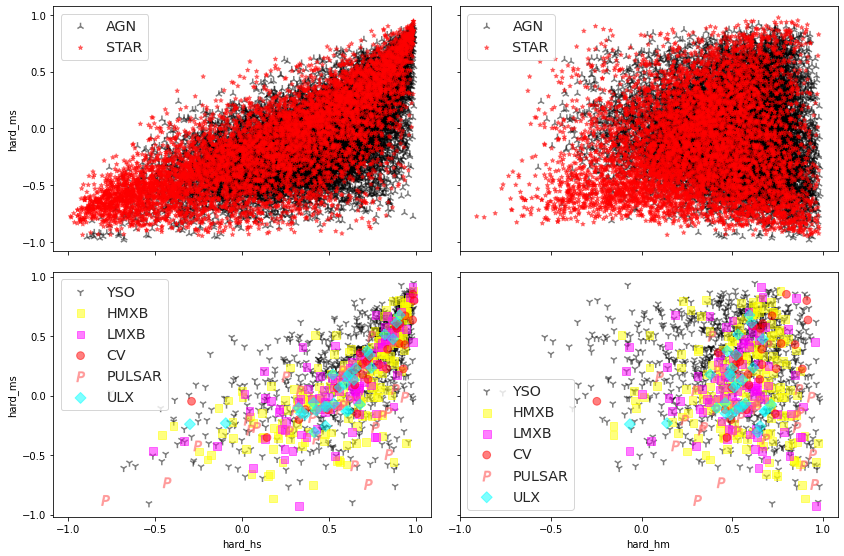

In [14]:
from utilities import plot_feat_feat
fig , ax =  plt.subplots(nrows = 2 , ncols=2 , figsize=(12,8) , sharey='row' , sharex='col')
ax = np.ravel(ax)
x1 = 'hard_hs'
x2 = 'hard_hm'
y = 'hard_ms'
plot_feat_feat(true_df, x1,y , ax=ax[0] , cl=['AGN' ,'STAR'])
plot_feat_feat(true_df, x2,y , ax=ax[1] , cl=['AGN' ,'STAR'])

plot_feat_feat(true_df, x1,y , ax=ax[2] , cl=['YSO' ,'HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])
plot_feat_feat(true_df, x2,y , ax=ax[3] , cl=['YSO' ,'HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])

for a in ax:
    a.legend()
ax[2].set_xlabel(x1)
ax[0].set_ylabel(y)
ax[2].set_ylabel(y)
ax[3].set_xlabel(x2)
#ax[0].set_xticklabels(rotation = 45, ha="right")
# plt.subplots_adjust(wspace=0.05, hspace=0 , bottom=0.2)
plt.tight_layout()
plt.legend()
#plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig(f'{img_loc}feat-1.jpg' , format='jpg')
plt.show()

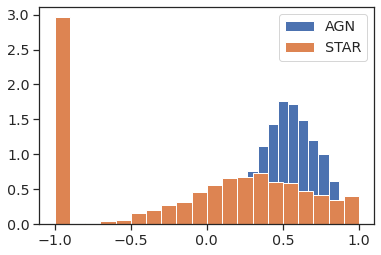

In [100]:
plt.hist(true_df[true_df['class']=='AGN']['hard_hm'] , label = 'AGN' , bins=30 , density=True)
plt.hist(true_df[true_df['class']=='STAR']['hard_hm'] , label='STAR' , bins=20 , density=True)
plt.legend()
plt.show()

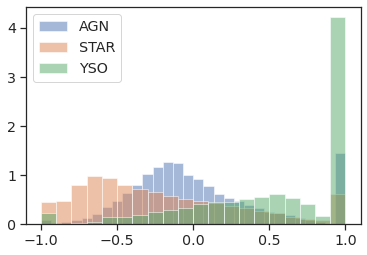

In [21]:
plt.hist(true_df[true_df['class']=='AGN']['hard_ms'] , label = 'AGN' , bins=30 , density=True , alpha=0.5)
plt.hist(true_df[true_df['class']=='STAR']['hard_ms'] , label='STAR' , bins=20 , density=True , alpha=0.5)
plt.hist(true_df[true_df['class']=='YSO']['hard_ms'] , label='YSO' , bins=20 , density=True , alpha=0.5)
plt.legend()
plt.show()

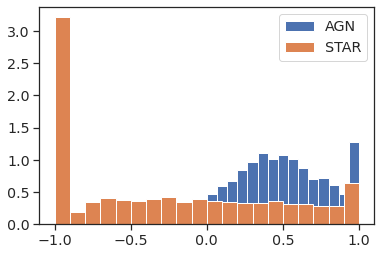

In [102]:
plt.hist(true_df[true_df['class']=='AGN']['hard_hs'] , label = 'AGN' , bins=30 , density=True)
plt.hist(true_df[true_df['class']=='STAR']['hard_hs'] , label='STAR' , bins=20 , density=True)
plt.legend()
plt.show()

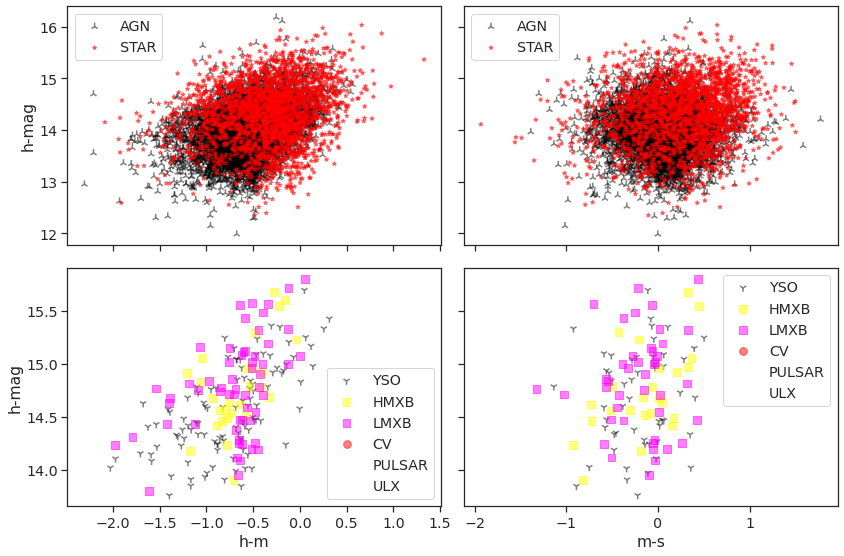

In [114]:
from utilities import plot_feat_feat
fig , ax =  plt.subplots(nrows = 2 , ncols=2 , figsize=(12,8) , sharey='row' , sharex='col')
ax = np.ravel(ax)
x1 = 'h-m'
x2 = 'm-s'
y = 'h-mag'
plot_feat_feat(true_df, x1,y , ax=ax[0] , cl=['AGN' ,'STAR'])
plot_feat_feat(true_df, x2,y , ax=ax[1] , cl=['AGN' ,'STAR'])

plot_feat_feat(true_df, x1,y , ax=ax[2] , cl=['YSO' ,'HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])
plot_feat_feat(true_df, x2,y , ax=ax[3] , cl=['YSO' ,'HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])

for a in ax:
    a.legend()
ax[2].set_xlabel(x1)
ax[0].set_ylabel(y)
ax[2].set_ylabel(y)
ax[3].set_xlabel(x2)
#ax[0].set_xticklabels(rotation = 45, ha="right")
# plt.subplots_adjust(wspace=0.05, hspace=0 , bottom=0.2)
plt.tight_layout()
plt.legend()
#plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig(f'{img_loc}feat-1.jpg' , format='jpg')
plt.show()

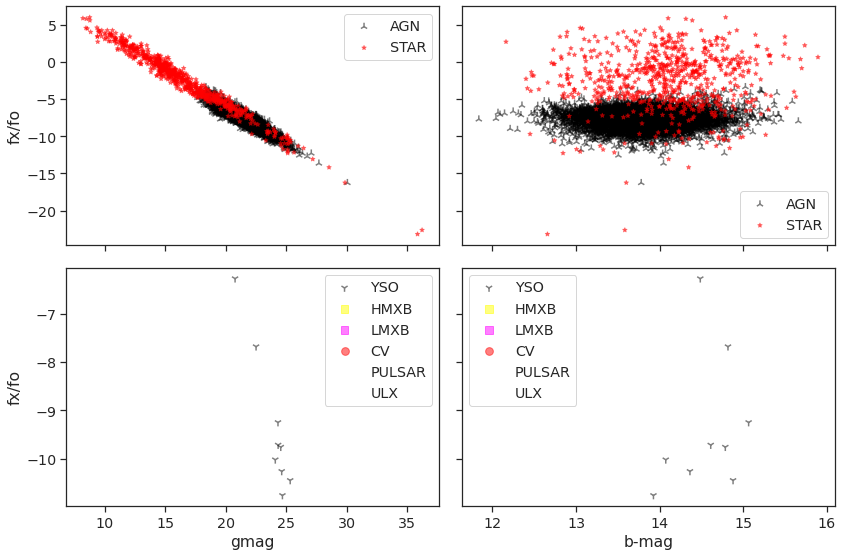

In [130]:
from utilities import plot_feat_feat
fig , ax =  plt.subplots(nrows = 2 , ncols=2 , figsize=(12,8) , sharey='row' , sharex='col')
ax = np.ravel(ax)
x1 = 'gmag'
x2 = 'b-mag'
y = 'fx/fo'
plot_feat_feat(true_df, x1,y , ax=ax[0] , cl=['AGN' ,'STAR'])
plot_feat_feat(true_df, x2,y , ax=ax[1] , cl=['AGN' ,'STAR'])

plot_feat_feat(true_df, x1,y , ax=ax[2] , cl=['YSO' ,'HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])
plot_feat_feat(true_df, x2,y , ax=ax[3] , cl=['YSO' ,'HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])

for a in ax:
    a.legend()
ax[2].set_xlabel(x1)
ax[0].set_ylabel(y)
ax[2].set_ylabel(y)
ax[3].set_xlabel(x2)
#ax[0].set_xticklabels(rotation = 45, ha="right")
# plt.subplots_adjust(wspace=0.05, hspace=0 , bottom=0.2)
plt.tight_layout()
plt.legend()
#plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig(f'{img_loc}feat-1.jpg' , format='jpg')
plt.show()

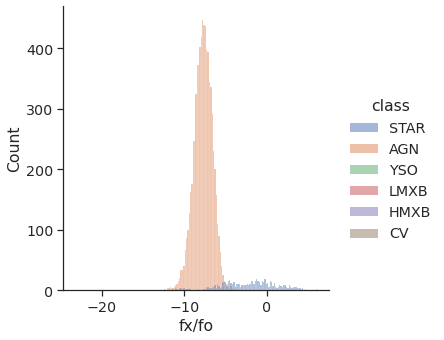

In [128]:
sns.displot(
    data = true_df,
    x = 'fx/fo' ,
    kind='hist' , 
    hue = 'class'
)
plt.show()

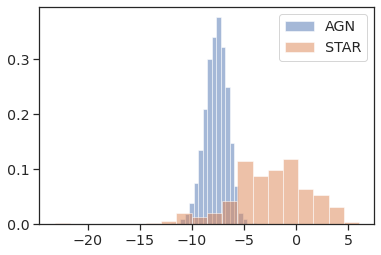

In [106]:
plt.hist(true_df[true_df['class']=='AGN']['fx/fo'] , label = 'AGN' , bins=30 , density=True , alpha=0.5)
plt.hist(true_df[true_df['class']=='STAR']['fx/fo'] , label='STAR' , bins=20 , density=True , alpha=0.5)
# plt.hist(true_df[true_df['class']=='YSO']['fx/fo'] , label='YSO' , bins=20 , density=True , alpha=0.5)
plt.legend()
plt.show()

In [2]:
df = pd.read_csv('../../not_on_git/final_classification/train_data.csv')
df = df[df['class']=='AGN']
# df = df[df['significance']>10]
df = df[df['offset']<1.01]
# df = df[df['var_flag']==1]
df = df.sort_values(by='significance' , ascending=False)[['name', 'catalog', 'cat_name', 'significance', 'var_flag', 'ra', 'dec']].set_index('name')
df.to_csv('temp_files/AGN_catalog_names.csv')

HE 1104-1805 - https://ui.adsabs.harvard.edu/abs/2012ApJ...755...82M/abstract
X 18 (other name - PKS 1138-262 ) https://www.aanda.org/articles/aa/full_html/2010/10/aa14188-10/aa14188-10.html
